## TensorFlow 2.2 MobileNet 模型训练 

In [11]:
#!pip install tensorflow==2.2.0rc2

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [4]:
from tensorflow import keras as keras

keras.backend.clear_session()  # For easy reset of notebook state.

In [5]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(include_top=False, weights='imagenet', classes=1000)

17227776/17225924 [==============================] - 0s 0us/step


In [6]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x) 
preds = Dense(2, activation='softmax')(x) #final layer with softmax activation

model = Model(inputs=base_model.input, outputs=preds, name="mobilenet_dog")

In [7]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image

import numpy as np

train_dir = 'data/train'
class_name = ["哈士奇", "金毛"]

def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224)) # MobileNet 输入图像尺寸 
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)


train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        color_mode='rgb',
        batch_size=10,
        class_mode='categorical',
        shuffle=True)

Found 20 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
10/10 [==============================] - 12s 1s/step - loss: 0.1761 - accuracy: 0.9400
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.3745 - accuracy: 0.9600
Epoch 3/5
10/10 [==============================] - 11s 1s/step - loss: 0.1447 - accuracy: 0.9700
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.1020 - accuracy: 0.9800
Epoch 5/5
10/10 [==============================] - 10s 1s/step - loss: 0.0051 - accuracy: 1.0000


In [12]:
from matplotlib import pyplot as plt

def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return img_tensor

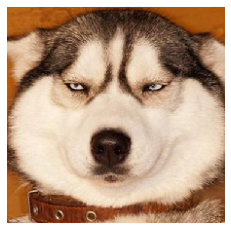

[['哈士奇', 1.0], ['金毛', 2.4470045e-27]]


In [13]:
img_path = 'data/test/3.jpg'
img_tensor = load_image(img_path)

pred = model.predict(img_tensor)

print([[class_name[i], prob] for i, prob in enumerate(pred[0])])

In [14]:
# Save SavedModel 
model.save("saved_model/mobilenet", save_format="tf")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/mobilenet/assets


In [15]:
# save H5 model
model.save("mobilenet_dog.h5")

In [15]:
# model.summary()

In [16]:
!ls saved_model/mobilenet

assets	saved_model.pb	variables


In [17]:
new_model = keras.models.load_model("mobilenet_dog.h5")

In [19]:
# new_model.summary()